In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import photoevolver as ph

In [36]:
"""
Here, we create a planet that is 10 Myr old and orbits 0.1 AU away from it host star.
It has a core mass (mcore) of 2 Earth masses, and a total radius (rp) of 3 Earth radii.
"""
planet = ph.core.Planet( age = 10, dist = 0.1, mcore = 2.0, rp = 3.0 )

In [37]:
"""
Print out the Planet object to see its parameters.

Notice that, if we give it core mass, it will automatically calculate the core radius.
This is done with mass-radius relations by Otegi et al. (2020), but you can also use your own
by giving it a core radius manually as well.

With the core parameters and the planet's radius, it was able to calculate the envelope radius,
which here it extends to more than two times the radius of the core.

In order to calculate the envelope and planet masses, it requires a structure formulation,
which we will provide later.
"""
print(planet)


          Radius    Mass      
Core      1.26      2.00      [ice:0% iron:33%]
Envelope  1.74      TBD       TBD
Total     3.00      TBD



In [38]:
"""
Now, we must obtain some more information about the host star.
Especifically, its mass, bolometric luminosity, and XUV luminosity across time.

A handy way to feed this information into the simulation is by using the module Mors,
by Colin P. Johnstone.

We will choose a typical K-dwarf star, with a rotation period of 15 days at an age of 700 Myr.
"""
import Mors as mors
star = mors.Star(Mstar = 0.66, Prot = 15.0, Age = 700.0)

In [39]:
"""
Then, we choose a formulation for the envelope structure and for the atmospheric mass loss.
"""
structure = ph.structure.LopezFortney14
mass_loss = ph.massloss.EnergyLimited

In [40]:
"""
Finally, we run the evolution code forward in time from the planet's age at 10 Myr to an age of 5 Gyr.
We will generate two planet sims, one with mass loss and one without it.
We also use a time step of 100_000 years (0.1 Myr), and, for the energy-limited formulation, an efficiency of 15%
and an effective XUV radius to planet radius ratio ("beta") of 2.0.
"""
full = ph.core.evolve_forward (
    planet = planet,
    star = star,
    struct = structure,
    mloss = mass_loss,
    age_end = 5000,
    time_step = 0.1,
    eff = 0.15,
    beta = 2.0
)

no_mloss = ph.core.evolve_forward (
    planet = planet,
    star = star,
    struct = structure,
    mloss = None,
    age_end = 5000,
    time_step = 0.1,
)

In [41]:
"""
Each track is an array that stores the value of each parameter at each simulation step.
Access them just like a python dictionary:
    tracks['Lbol']
The available tracks are the following:
"""
print( full.keys() )

dict_keys(['Age', 'Lbol', 'Lxuv', 'Rp', 'Mp', 'Menv', 'Renv', 'Fenv', 'Dens'])


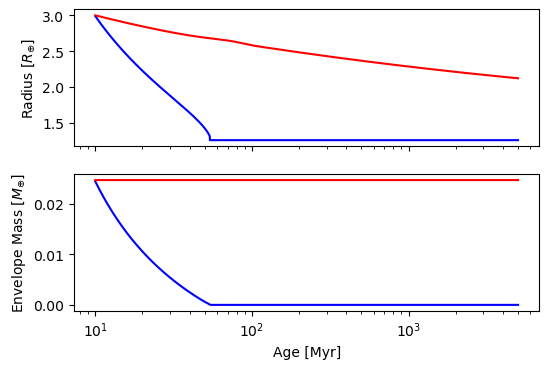

In [42]:
"""
Now we will plot the radius and mass evolution of the planet in both cases.
"""

fig, (axr, axm) = plt.subplots(nrows = 2, dpi = 100, sharex = True)

axr.set_xscale('log')
axm.set_xlabel('Age [Myr]')
axr.set_ylabel(r'Radius [$R_{\oplus}$]')
axm.set_ylabel(r'Envelope Mass [$M_{\oplus}$]')

axr.plot(full['Age'], full['Rp'], 'b-', label = "Full tracks")
axr.plot(no_mloss['Age'], no_mloss['Rp'], 'r-', label = "No mass loss")

axm.plot(full['Age'], full['Menv'], 'b-')
axm.plot(no_mloss['Age'], no_mloss['Menv'], 'r-')

In [45]:
"""
With mass loss enabled, the planet loses its envelope by the age of about 55 Myr.
Without mass loss, the envelope simply contracts following as it cools down.
"""
print()